## Import Required Libraries

In [4]:
%matplotlib inline

# This will reload all modules before executing a new line
# This is important, if we change our modules, we don't have to restart the kernel
%load_ext autoreload
%autoreload 2

from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import loading_data as ld

## Loading Data

In [5]:
df_train = ld.load_train_values()
df_label = ld.load_train_labels()
df_test = ld.load_test_values()

In [6]:
print(df_train.shape)
print(df_label.shape)
print(df_test.shape)

(260601, 39)
(260601, 2)
(86868, 39)


## Data Exploration

### Finding the missing values

In [7]:
df_train_summary = pd.DataFrame({
    "Data type": df_train.dtypes,
    "Any nulls?": df_train.isnull().any(),
    "Unique values": df_train.nunique()
})
print(df_train_summary)

                                       Data type  Any nulls?  Unique values
building_id                                int64       False         260601
geo_level_1_id                             int64       False             31
geo_level_2_id                             int64       False           1414
geo_level_3_id                             int64       False          11595
count_floors_pre_eq                        int64       False              9
age                                        int64       False             42
area_percentage                            int64       False             84
height_percentage                          int64       False             27
land_surface_condition                    object       False              3
foundation_type                           object       False              5
roof_type                                 object       False              3
ground_floor_type                         object       False              5
other_floor_

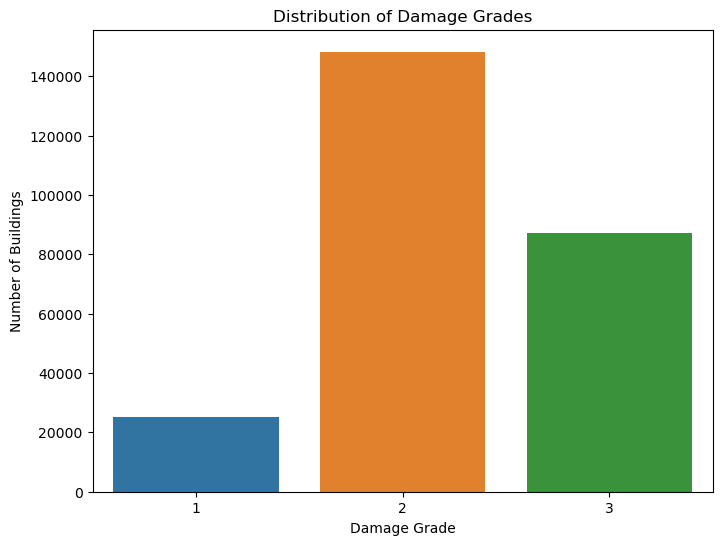

In [8]:
# Create a bar chart for damage grades
plt.figure(figsize=(8, 6))
sns.countplot(x='damage_grade', data=df_label)
plt.title('Distribution of Damage Grades')


# Show the plot
plt.ylabel('Number of Buildings')
plt.xlabel('Damage Grade')
plt.show()

In [9]:
# using seaborn plot selected_features = ['foundation_type',
#                      'area_percentage',
#                      'height_percentage',
#                      'count_floors_pre_eq',
#                      'land_surface_condition',
#                      'has_superstructure_cement_mortar_stone']

sns.pairplot(df_train.join(df_label.drop('building_id', axis=1)[:40]), hue='damage_grade')



/Users/carstenlawrenz/anaconda3/envs/dsr-setup/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Since there is no null, no data cleaning yet. (for rows)

## Data Preparation

### Balancing the data

In [30]:
import balancing_data as bd

df_train_balanced, df_label_balanced = bd.balance_dataset(df_train, df_label)

### Data Cleaning, Dropping the unnecessary columns, Encoding the categorical variables

In [31]:
import dropping_columns as dc

df_train_engineered = dc.engineer_features(df_train_balanced)

Dropping 35 columns from the dataframe.
List of columns to drop:
0:	building_id
1:	land_surface_condition
2:	foundation_type
3:	roof_type
4:	ground_floor_type
5:	other_floor_type
6:	position
7:	plan_configuration
8:	legal_ownership_status
9:	geo_level_1_id
10:	geo_level_2_id
11:	geo_level_3_id
12:	has_superstructure_adobe_mud
13:	has_superstructure_mud_mortar_stone
14:	has_superstructure_stone_flag
15:	has_superstructure_cement_mortar_stone
16:	has_superstructure_mud_mortar_brick
17:	has_superstructure_cement_mortar_brick
18:	has_superstructure_timber
19:	has_superstructure_bamboo
20:	has_superstructure_rc_non_engineered
21:	has_superstructure_rc_engineered
22:	has_superstructure_other
23:	count_families
24:	has_secondary_use
25:	has_secondary_use_agriculture
26:	has_secondary_use_hotel
27:	has_secondary_use_rental
28:	has_secondary_use_institution
29:	has_secondary_use_school
30:	has_secondary_use_industry
31:	has_secondary_use_health_post
32:	has_secondary_use_gov_office
33:	has_seco

In [32]:
df_train_engineered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 4 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   count_floors_pre_eq  260601 non-null  int64
 1   age                  260601 non-null  int64
 2   area_percentage      260601 non-null  int64
 3   height_percentage    260601 non-null  int64
dtypes: int64(4)
memory usage: 8.0 MB


## 3. Modeling: Selection and Implementation

In [39]:
import models as md

X_train, X_test, y_train, y_test, rf_model = md.make_and_return_model(df_train_engineered, df_label_balanced)


## 4. Evaluation

In [40]:
# Predictions
preds = rf_model.predict(X_test)

# We want to evaluate our model with micro average f1 score
from sklearn.metrics import f1_score
f1_score(y_test, preds, average='micro')

0.5680627769996739

** Predictions**

01: 0.5682738243702155

In [41]:
# How is the model doing on each class?
from sklearn.metrics import classification_report
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           1       0.58      0.06      0.10      5170
           2       0.57      0.99      0.72     29487
           3       0.00      0.00      0.00     17464

    accuracy                           0.57     52121
   macro avg       0.38      0.35      0.28     52121
weighted avg       0.38      0.57      0.42     52121



/home/johannes/anaconda3/envs/dsr-13sep/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/johannes/anaconda3/envs/dsr-13sep/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/johannes/anaconda3/envs/dsr-13sep/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

**NOTE: It's doing really bad on class 3, which is the second most common class.**

## 5. Predictions Output

Preparing the predictions for the competition
Format for the submission file (csv):

building_id,damage_grade
11456,1
16528,1
3253,1
18614,1
1544,1

(all numbers need to be integers!)

Steps:
* make a dataframe with the building_id
* add the predictions to the dataframe (damage_grade)
* make building_id the index
* save to csv

In [43]:
# Doing the same preprocessing steps as we did for the training data
df_test_engineered = dc.engineer_features(df_test)

# dataframe with the building_id column
df_test_pred = df_test[['building_id']]

# Predictions adding to the dataframe
df_test_pred['damage_grade'] = rf_model.predict(df_test_engineered)

# making building_id the index
df_test_pred.set_index('building_id', inplace=True)

# Saving the dataframe to a csv file
df_test_pred.to_csv('../data/submission.csv')

Dropping 35 columns from the dataframe.
List of columns to drop:
0:	building_id
1:	land_surface_condition
2:	foundation_type
3:	roof_type
4:	ground_floor_type
5:	other_floor_type
6:	position
7:	plan_configuration
8:	legal_ownership_status
9:	geo_level_1_id
10:	geo_level_2_id
11:	geo_level_3_id
12:	has_superstructure_adobe_mud
13:	has_superstructure_mud_mortar_stone
14:	has_superstructure_stone_flag
15:	has_superstructure_cement_mortar_stone
16:	has_superstructure_mud_mortar_brick
17:	has_superstructure_cement_mortar_brick
18:	has_superstructure_timber
19:	has_superstructure_bamboo
20:	has_superstructure_rc_non_engineered
21:	has_superstructure_rc_engineered
22:	has_superstructure_other
23:	count_families
24:	has_secondary_use
25:	has_secondary_use_agriculture
26:	has_secondary_use_hotel
27:	has_secondary_use_rental
28:	has_secondary_use_institution
29:	has_secondary_use_school
30:	has_secondary_use_industry
31:	has_secondary_use_health_post
32:	has_secondary_use_gov_office
33:	has_seco

/tmp/ipykernel_6094/3636281810.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_pred['damage_grade'] = rf_model.predict(df_test_engineered)


**Submissions**

01 by Johannes: 0.5683